In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
stat = pd.read_csv('./pitchers_stat_fin.csv')

In [4]:
stat

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,mean_ERA,park_factor,Adj_ERA,연차,QS_G,SO_G,K_BB,cFIP,pFIP,WAR_won
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,4.756261,939,154.537353,4,0.000000,1.047619,1.941176,3.995,15.685141,1.812500
1,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,4.756261,939,117.529724,4,0.095238,2.238095,2.685714,3.995,5.076301,5.864407
2,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,4.756261,939,96.252791,5,0.166667,2.023810,1.287879,3.995,5.207121,0.885185
3,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,4.756261,939,92.466449,9,0.000000,0.476190,1.538462,3.995,5.312073,0.195238
4,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,4.756261,939,91.331891,3,0.000000,1.862069,2.454545,3.995,14.900660,2.862069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,4.140846,1025,81.154253,4,0.250000,3.142857,1.275362,3.849,18.515667,1.171429
440,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,4.140846,1025,81.154253,12,0.080000,1.300000,1.857143,3.849,5.268048,0.111429
441,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,4.140846,1025,75.522552,1,0.000000,1.040000,1.793103,3.849,18.884088,-0.500000
442,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,4.140846,1025,74.462587,1,0.058824,2.235294,1.225806,3.849,17.061766,0.266667


In [5]:
stat.columns

Index(['순위', '선수명', '팀명', 'ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H',
       'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG', '2B', '3B', 'SAC', 'SF', 'IBB', 'WP', 'BK', '연도',
       '현재연봉', 'WAR_x', '예측연봉', 'tier', 'mean_ERA', 'park_factor', 'Adj_ERA',
       '연차', 'QS_G', 'SO_G', 'K_BB', 'cFIP', 'pFIP', 'WAR_won'],
      dtype='object')

In [6]:
stat['RA_9'] = (stat['R'] / stat['IP']) * 9

In [7]:
stat['RA_9']

0      4.309859
1      3.804878
2      5.318182
3      5.268293
4      5.094340
         ...   
439    5.750000
440    5.742857
441    6.157895
442    6.702128
443    6.412500
Name: RA_9, Length: 444, dtype: float64

In [8]:
stat

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,...,park_factor,Adj_ERA,연차,QS_G,SO_G,K_BB,cFIP,pFIP,WAR_won,RA_9
0,4,박치국,두산,2.89,63,4,4,0,7,0.500,...,939,154.537353,4,0.000000,1.047619,1.941176,3.995,15.685141,1.812500,4.309859
1,9,최원준,두산,3.80,42,10,2,0,0,0.833,...,939,117.529724,4,0.095238,2.238095,2.685714,3.995,5.076301,5.864407,3.804878
2,11,이영하,두산,4.64,42,5,11,6,0,0.313,...,939,96.252791,5,0.166667,2.023810,1.287879,3.995,5.207121,0.885185,5.318182
3,12,윤명준,두산,4.83,42,1,0,2,7,1.000,...,939,92.466449,9,0.000000,0.476190,1.538462,3.995,5.312073,0.195238,5.268293
4,13,김민규,두산,4.89,29,1,2,1,0,0.333,...,939,91.331891,3,0.000000,1.862069,2.454545,3.995,14.900660,2.862069,5.094340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,14,오원석,SSG,5.23,28,8,10,0,0,0.444,...,1025,81.154253,4,0.250000,3.142857,1.275362,3.849,18.515667,1.171429,5.750000
440,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1025,81.154253,12,0.080000,1.300000,1.857143,3.849,5.268048,0.111429,5.742857
441,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1025,75.522552,1,0.000000,1.040000,1.793103,3.849,18.884088,-0.500000,6.157895
442,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,1025,74.462587,1,0.058824,2.235294,1.225806,3.849,17.061766,0.266667,6.702128


In [9]:
stat.describe()

,순위,ERA,G,W,L,SV,HLD,WPCT,IP,H,...,park_factor,Adj_ERA,연차,QS_G,SO_G,K_BB,cFIP,pFIP,WAR_won,RA_9
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,...,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,11.518018,4.164955,39.529279,4.671171,4.418919,2.551802,4.993243,0.497644,79.328829,27.680180,...,1001.722973,116.828825,8.761261,0.153378,2.097899,2.175684,3.850867,12.420770,1.290540,4.653764
std,6.067873,1.325098,17.290808,3.792588,3.050397,7.160496,7.128770,0.240821,43.913520,44.048086,...,34.601665,41.075894,4.862139,0.231618,1.715356,0.973959,0.090706,5.985756,1.793499,1.410576
min,1.000000,1.480000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.300000,...,939.000000,44.556799,1.000000,0.000000,0.306452,0.580645,3.767000,2.666653,-1.483871,1.575000
25%,6.000000,3.260000,26.000000,2.000000,2.000000,0.000000,0.000000,0.333000,47.000000,0.300000,...,976.000000,89.201339,5.000000,0.000000,0.787338,1.497093,3.767000,5.421240,0.229432,3.607627
50%,11.000000,3.990000,36.500000,4.000000,4.000000,0.000000,1.000000,0.500000,61.500000,0.600000,...,1005.000000,108.334945,8.000000,0.000000,1.168440,1.935133,3.849000,14.609014,0.782292,4.473529
75%,16.000000,5.020000,54.250000,6.000000,6.000000,1.000000,8.000000,0.640750,107.000000,51.000000,...,1032.250000,134.522194,12.000000,0.285714,3.455435,2.684586,3.995000,17.034382,1.661649,5.640921
max,25.000000,10.760000,80.000000,19.000000,14.000000,44.000000,35.000000,1.000000,207.000000,183.000000,...,1058.000000,305.370161,22.000000,0.846154,8.035714,6.782609,3.995000,25.576273,12.000000,11.414634


In [31]:
model = sm.OLS(stat['예측연봉'], stat[['W', '연차', 'WAR_x', 'Adj_ERA', 'WHIP', 'SO_G', 'pFIP','QS_G', 'WAR_won', 'K_BB', 'RA_9','현재연봉']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   예측연봉   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              128.3
Date:                Fri, 30 Aug 2024   Prob (F-statistic):                   4.90e-134
Time:                        10:44:56   Log-Likelihood:                         -4997.6
No. Observations:                 444   AIC:                                  1.002e+04
Df Residuals:                     432   BIC:                                  1.007e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
W           -272.1668    418.119     -0.651      0.515   -1093.968     549.634
연차           641.8924    209.284      3.067      0.002     230.552    1053.233
WAR_x       6271.2540   1558.905      4.023      0.000    3207.273    9335.235
Adj_ERA       42.1664     33.287      1.267      0.206     -23.259     107.592
WHIP        7523.7709   6463.623      1.164      0.245   -5180.290    2.02e+04
SO_G         -95.8044   1447.794     -0.066      0.947   -2941.400    2749.791
pFIP         -63.4858    158.474     -0.401      0.689    -374.961     247.989
QS_G        3.851e+04   1.22e+04      3.150      0.002    1.45e+04    6.25e+04
WAR_won    -4878.5876    662.874     -7.360      0.000   -6181.448   -3575.728
K_BB        2863.6186   1250.501      2.290      0.023     405.796    5321.441
RA_9       -2533.4350   1536.079     -1.649      0.100   -5552.553     485.683
현재연봉           0.1230      0.023      5.328      0.000       0.078       0.168
==============================================================================
Omnibus:                      295.701   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4590.074
Skew:                           2.625   Prob(JB):                         0.00
Kurtosis:                      17.851   Cond. No.                     6.94e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
y, X = dmatrices('예측연봉 ~ ERA + W + 연차 + WAR_x + Adj_ERA + WHIP + SO_G + QS_G + K_BB + pFIP + WAR_won + 현재연봉', data = stat, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF_Factor,features
0,279.469697,Intercept
1,6.672192,ERA
2,3.140714,W
3,1.342364,연차
4,8.400275,WAR_x
5,5.144474,Adj_ERA
6,3.948942,WHIP
7,7.484472,SO_G
8,9.812850,QS_G
9,2.152877,K_BB


<Axes: xlabel='ERA', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabt

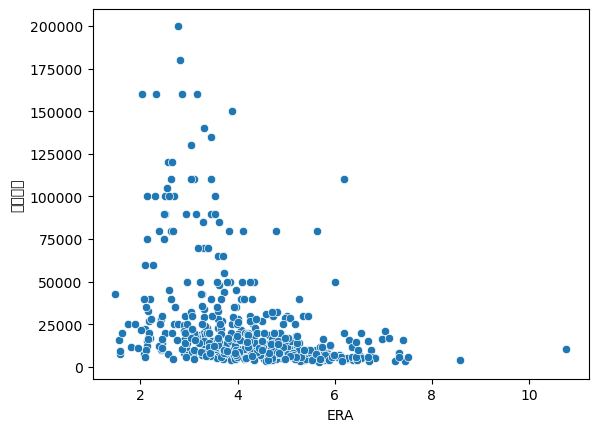

In [36]:
sns.scatterplot(x = stat['ERA'], y = stat['예측연봉'])

In [14]:
stat_corr = stat[['ERA','W', '연차', 'WAR_x', 'Adj_ERA', 'WHIP', 'WPCT','SO_G', 'pFIP','QS_G', 'WAR_won', 'K_BB', 'RA_9','현재연봉', '예측연봉']].corr()

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.draw()
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from curren

<Axes: >

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: 

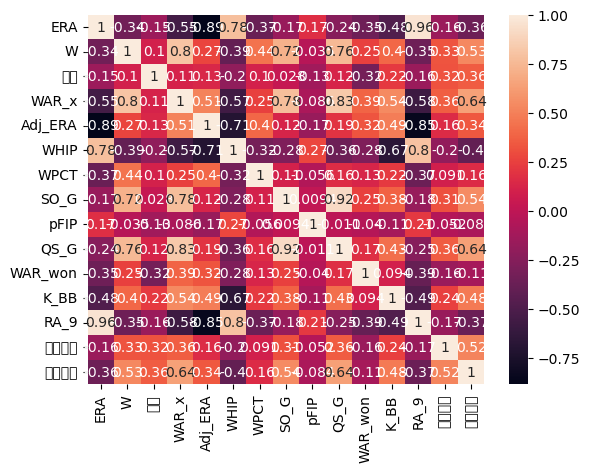

In [15]:
sns.heatmap(stat_corr, annot = True)

<Axes: xlabel='연차', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarnin

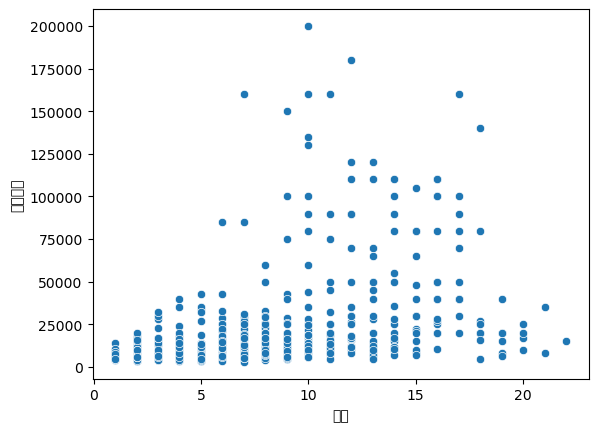

In [33]:
sns.scatterplot(x = stat['연차'], y = stat['예측연봉'])

<Axes: xlabel='QS', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabt

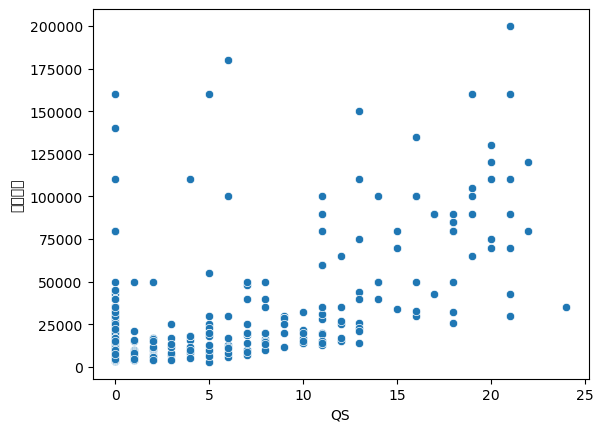

In [38]:
sns.scatterplot(x = stat['QS'], y = stat['예측연봉'])

<Axes: xlabel='QS_G', ylabel='예측연봉'>

c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\envs\arti\Lib\site-packages\IPython\core\pylabt

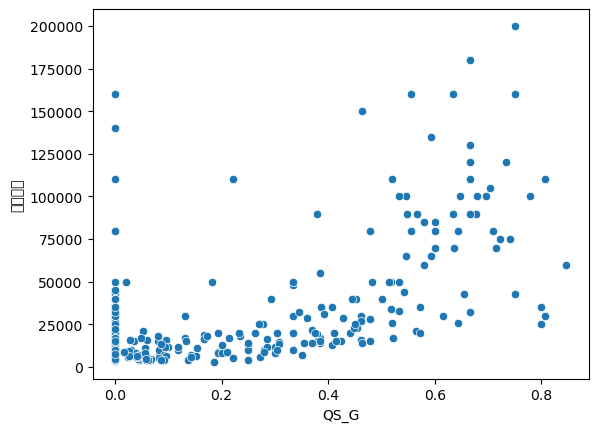

In [39]:
sns.scatterplot(x = stat['QS_G'], y = stat['예측연봉'])